# Finding exoplanet with RV (AstroTwin)

In the following work, I used some data from the website https://exoplanetarchive.ipac.caltech.edu to calculate the period and the minimum mass of some planets.

In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy import signal
from scipy.optimize import curve_fit
%pylab inline

Dat1 = np.loadtxt("RV1.dat")
Dat2 = np.loadtxt("RV2.dat")
Dat3 = np.loadtxt("RV3.dat")


Populating the interactive namespace from numpy and matplotlib


/home/morales/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


The planetary data is usually not taken periodically because of the restrictions of earth rotation and the accessibility of the observatories.
Here I take data from 3 star that are planet's hosts, for facility issues lets call planet 1, 2 and 3.

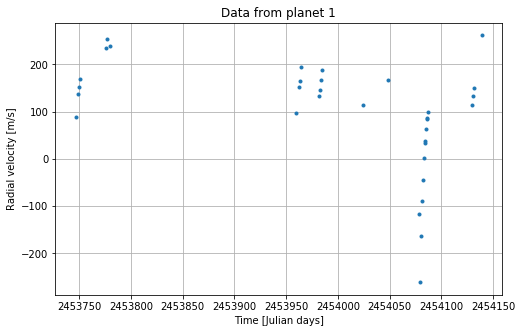

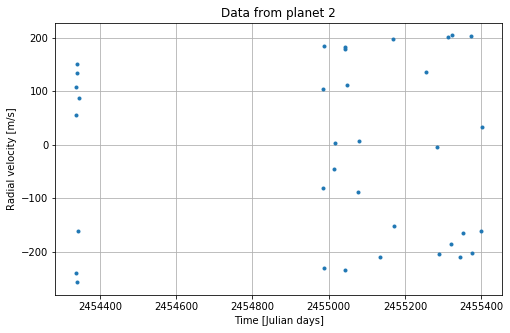

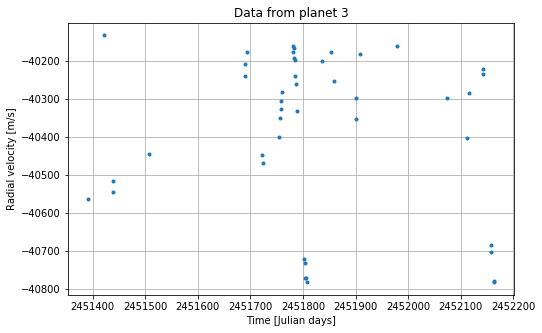

In [2]:
plt.figure(figsize=(8,5))
plt.plot(Dat1[:,0],Dat1[:,1],".")
plt.title("Data from planet 1")
plt.xlabel("Time [Julian days]")
plt.ylabel("Radial velocity [m/s]")
plt.grid()
#plt.figure(figsize=(8,5))
#plt.plot(Dat1[:,0],Dat1[:,2],".")


plt.figure(figsize=(8,5))
plt.plot(Dat2[:,0],Dat2[:,1],".")
plt.title("Data from planet 2")
plt.xlabel("Time [Julian days]")
plt.ylabel("Radial velocity [m/s]")
plt.grid()
#plt.figure(figsize=(8,5))
#plt.plot(Dat2[:,0],Dat2[:,2],".")

plt.figure(figsize=(8,5))
plt.plot(Dat3[:,0],Dat3[:,1],".")
plt.title("Data from planet 3")
plt.xlabel("Time [Julian days]")
plt.ylabel("Radial velocity [m/s]")
plt.grid()
#plt.figure(figsize=(8,5))
#plt.plot(Dat3[:,0],Dat3[:,2],".")

Tle classical periodogram is defined as:
$$P(f)=\frac{1}{N}\left|\sum_{n=1}^N g_ne^{-2\pi i ft_n}\right|^2$$
So we can rewrite it as:
$$P(f)=\frac{1}{N}\left[\left(\sum_{n=1}^N g_nCos(2\pi ft_n)\right)^2+\left(\sum_{n=1}^N g_nSin(2\pi ft_n)\right)^2\right]$$

But the unfortunately, when the sampling becomes nonuniform this periodogram distribution cannot in general be analytically expressed.

So it was proposed the Lomb-Scargle periodogram:

$$P_{LS}=\frac{1}{2}\left(\frac{\left[\sum_n g_nCos(2\pi f[t_n-\tau])\right]}{Cos^2(2\pi f[t_n-\tau])}+\frac{\left[\sum_n g_nSin(2\pi f[t_n-\tau])\right]}{Sin^2(2\pi f[t_n-\tau])}\right)$$

Where $$\tau=\frac{1}{4\pi f}Tan^{-1}\left(\frac{\sum_nSin(4\pi f t_n)}{\sum_nCos(4\pi f t_n)}\right)$$

As we saw, to use the Lomb-Scargle periodogram is necesary for the data to have an average value of 0, and clearly for the third system this is not true, so I had to subtract the mean value to every point.
I looked for periods greater than $\frac{2\pi}{10}$ and taked the greatest value of the periodogram as the period of the planet (with an exception if the greatest value is near to $2\pi$ because this periodicity is because the earth rotation)

In [3]:
f = np.linspace(0.01, 10, 1000)

Dat3[:,1]=Dat3[:,1]-np.mean(Dat3[:,1])

pgram1 = signal.lombscargle(Dat1[:,0],Dat1[:,1],f)
pgram2 = signal.lombscargle(Dat2[:,0],Dat2[:,1],f)
pgram3 = signal.lombscargle(Dat3[:,0],Dat3[:,1],f)

Text(0.5, 0, 'Frecuency $[\\frac{1}{JD}]$')

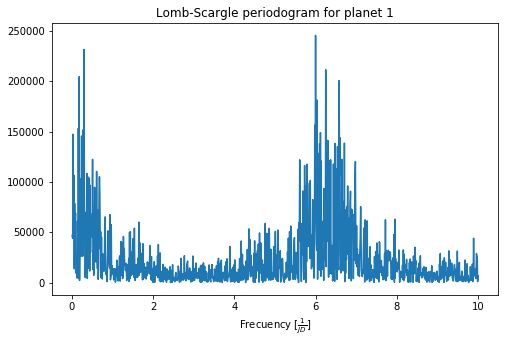

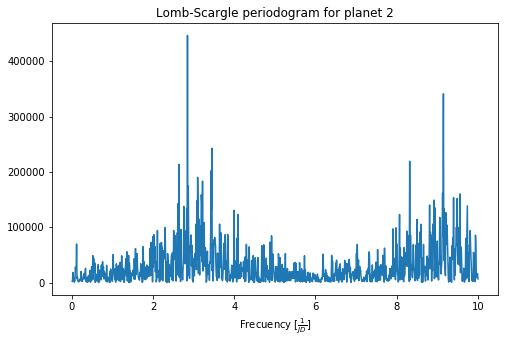

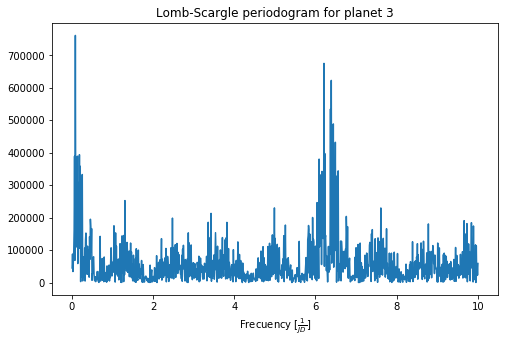

In [4]:
plt.figure(figsize=(8,5))
plt.plot(f,pgram1)
plt.title("Lomb-Scargle periodogram for planet 1")
plt.xlabel(r"Frecuency $[\frac{1}{JD}]$")

plt.figure(figsize=(8,5))
plt.plot(f,pgram2)
plt.title("Lomb-Scargle periodogram for planet 2")
plt.xlabel(r"Frecuency $[\frac{1}{JD}]$")

plt.figure(figsize=(8,5))
plt.plot(f,pgram3)
plt.title("Lomb-Scargle periodogram for planet 3")
plt.xlabel(r"Frecuency $[\frac{1}{JD}]$")

In [5]:
period1=2*np.pi/f[pgram1==np.sort(pgram1)[-2]]
period2=2*np.pi/f[pgram2==max(pgram2)]
period3=2*np.pi/f[pgram3==np.sort(pgram3)[-1]]
print("The period for the first planet is: %1.2f JD \nFor the second planet is:%1.2f JD \nAnd for the third planet is: %1.2f JD"%(period1[0],period2[0],period3[0]))

The period for the first planet is: 20.94 JD 
For the second planet is:2.20 JD 
And for the third planet is: 69.81 JD


Now is possible to graph all the data of each planet in just one period.

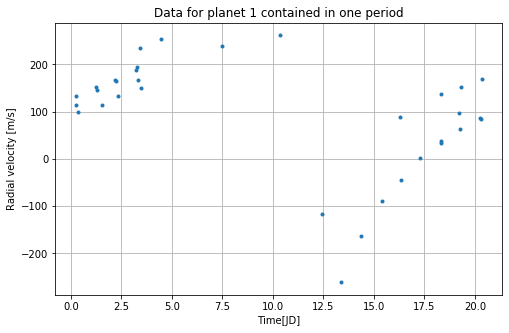

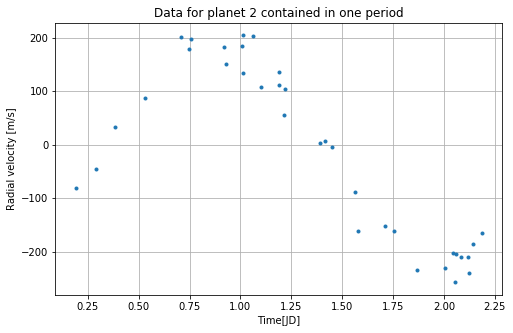

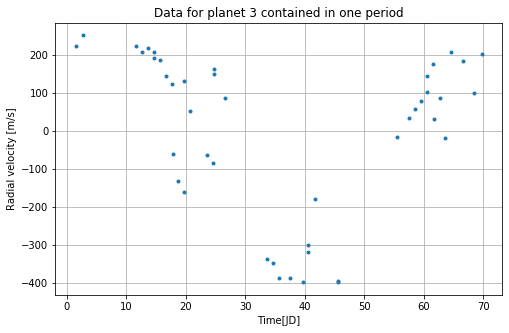

In [6]:
plt.figure(figsize=(8,5))
plt.plot(Dat1[:,0] % period1[0],Dat1[:,1],".")
plt.title("Data for planet 1 contained in one period")
plt.xlabel("Time[JD]")
plt.ylabel("Radial velocity [m/s]")
plt.grid()

plt.figure(figsize=(8,5))
plt.plot(Dat2[:,0] % period2[0],Dat2[:,1],".")
plt.title("Data for planet 2 contained in one period")
plt.xlabel("Time[JD]")
plt.ylabel("Radial velocity [m/s]")
plt.grid()

plt.figure(figsize=(8,5))
plt.plot(Dat3[:,0] % period3[0],Dat3[:,1],".")
plt.title("Data for planet 3 contained in one period")
plt.xlabel("Time[JD]")
plt.ylabel("Radial velocity [m/s]")
plt.grid()

From these plots is possible then make an adjustment, supposing that the moving of the star in the radial direction because of the planet is of the form of a sinusoidal wave.

In [7]:
def func(x, a, c, d):
    return a * np.sin(2*np.pi/period2[0]*x+c) + d
def funcP3(x, a, c, d):
    return a * np.sin(2*np.pi/period3[0]*x+c) + d
def funcP1(x, a, c, d):
    return a * np.sin(2*np.pi/period1[0]*x+c) + d
def func2(x, a, c):
    return a * x + c

In [8]:
popt1, pcov1 = curve_fit(funcP1, Dat1[:,0] % period1[0], Dat1[:,1])
popt2, pcov2 = curve_fit(func, Dat2[:,0] % period2[0], Dat2[:,1])
popt3, pcov3 = curve_fit(funcP3, Dat3[:,0] % period3[0], Dat3[:,1])

Text(0.5, 0, 'Time (Julian days)')

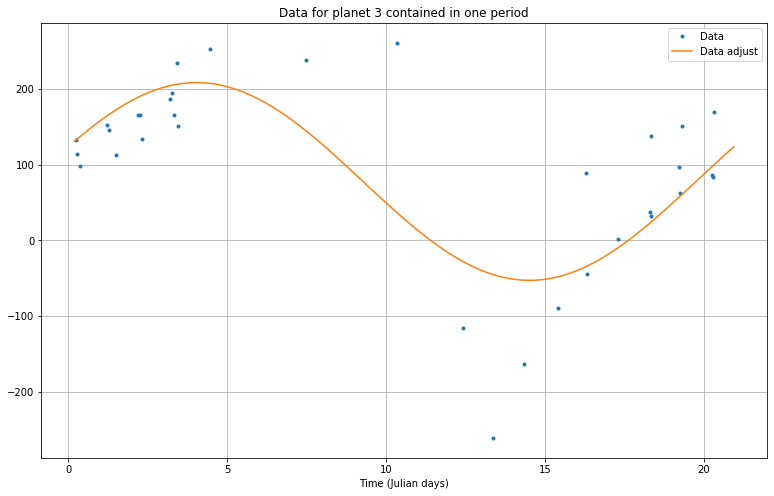

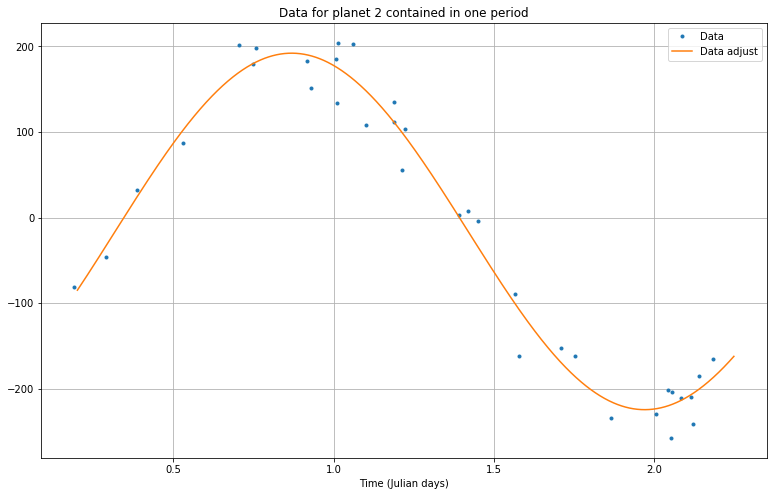

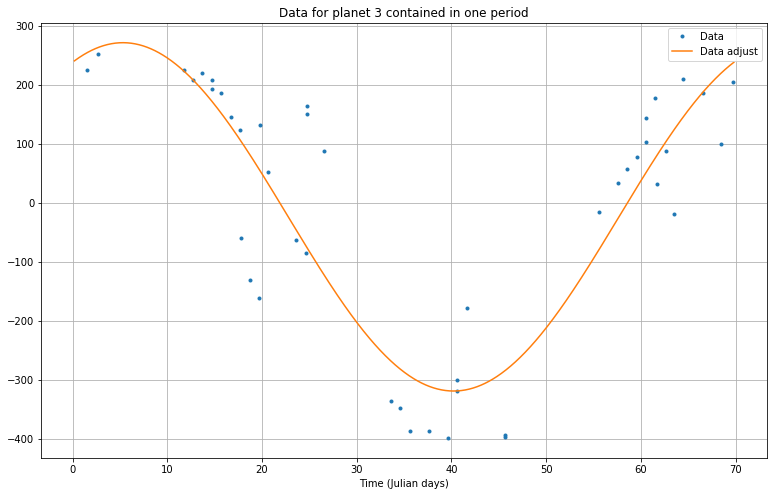

In [9]:
plt.figure(figsize=(13,8))
plt.plot(Dat1[:,0] % period1[0], Dat1[:,1],".",label="Data")
plt.plot(np.linspace(0.2,period1[0],1000),funcP1(np.linspace(0.2,period1[0],1000),*popt1),label="Data adjust")
plt.legend()
plt.grid()
plt.ylabel("")
plt.title("Data for planet 3 contained in one period")
plt.xlabel("Time (Julian days)")

plt.figure(figsize=(13,8))
plt.plot(Dat2[:,0] % period2[0], Dat2[:,1],".",label="Data")
plt.plot(np.linspace(0.2,2.25,1000),func(np.linspace(0.2,2.25,1000),*popt2),label="Data adjust")
plt.legend()
plt.grid()
plt.title("Data for planet 2 contained in one period")
plt.xlabel("Time (Julian days)")

plt.figure(figsize=(13,8))
plt.plot(Dat3[:,0] % period3[0], Dat3[:,1],".",label="Data")
plt.plot(np.linspace(0.2,period3[0],1000),funcP3(np.linspace(0.2,period3[0],1000),*popt3),label="Data adjust")
plt.legend()
plt.grid()
plt.ylabel("")
plt.title("Data for planet 3 contained in one period")
plt.xlabel("Time (Julian days)")

Below is shown the plot of the residuals (difference between the real data and the adjustment).

Text(0.5, 1.0, 'Difference between the adjustment and the data (planet 3)')

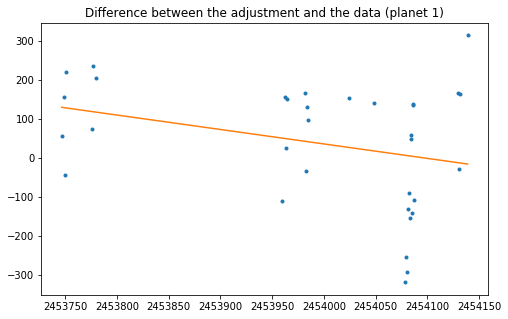

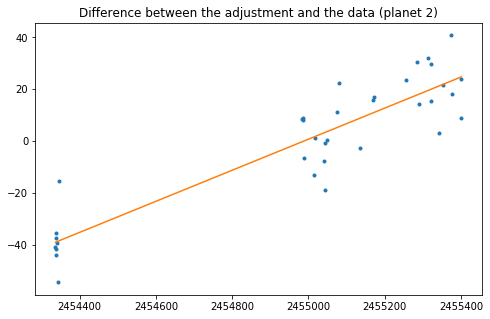

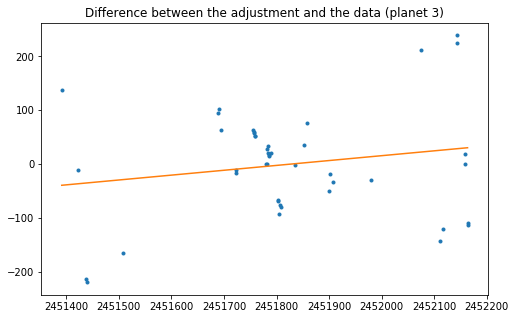

In [10]:
plt.figure(figsize(8,5))
Residuo1= Dat1[:,1]-(func(Dat1[:,0],*popt1))
plt.plot(Dat1[:,0],Residuo1,".")

popt11, pcov11 = curve_fit(func2,Dat1[:,0] , Residuo1)
plt.plot(Dat1[:,0],func2(Dat1[:,0],*popt11))
plt.title("Difference between the adjustment and the data (planet 1)")

plt.figure(figsize(8,5))
Residuo= Dat2[:,1]-(func(Dat2[:,0],*popt2))
plt.plot(Dat2[:,0],Residuo,".")

popt21, pcov21 = curve_fit(func2,Dat2[:,0] , Residuo)
plt.plot(Dat2[:,0],func2(Dat2[:,0],*popt21))
plt.title("Difference between the adjustment and the data (planet 2)")

plt.figure(figsize(8,5))
Residuo3= Dat3[:,1]-(funcP3(Dat3[:,0],*popt3))
plt.plot(Dat3[:,0],Residuo3,".")

popt31, pcov31 = curve_fit(func2,Dat3[:,0] , Residuo3)
plt.plot(Dat3[:,0],func2(Dat3[:,0],*popt31))
plt.title("Difference between the adjustment and the data (planet 3)")


In the plot of the residuals, is possible to observe that for the second planet these values increase like a linear function, this is probably because another massive body is disturbing constantly the movement of the system. And there is a long period signal behind the principal signal.

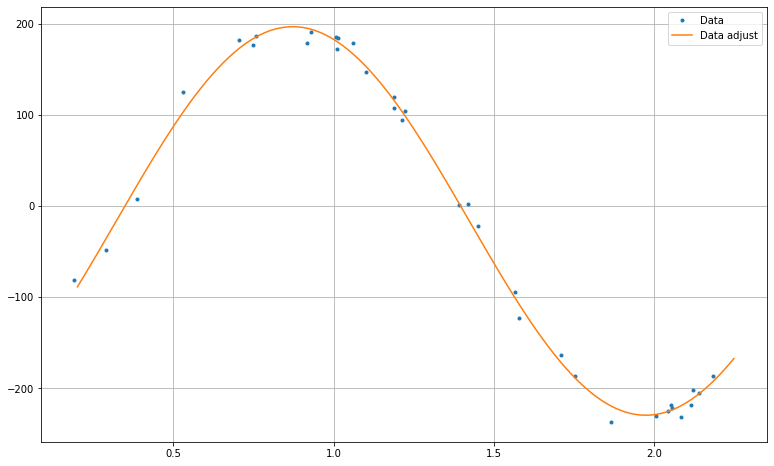

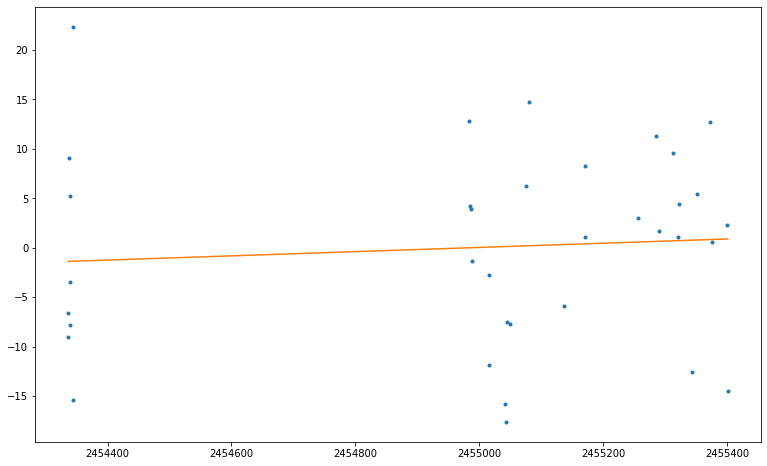

In [11]:
ExtraValues = func2(Dat2[:,0],*popt21)

NewVal=Dat2[:,1]-ExtraValues

popt22, pcov22 = curve_fit(func, Dat2[:,0] % period2[0], NewVal)

plt.figure(figsize=(13,8))
plt.plot(Dat2[:,0] % period2[0], NewVal,".",label="Data")
plt.plot(np.linspace(0.2,2.25,1000),func(np.linspace(0.2,2.25,1000),*popt22),label="Data adjust")
plt.legend()
plt.grid()

Residuo2 =  NewVal - func(Dat2[:,0],*popt22) 
plt.figure(figsize=(13,8))
plt.plot(Dat2[:,0],Residuo2,".")

popt23, pcov21 = curve_fit(func2,Dat2[:,0] , Residuo2)
plt.plot(Dat2[:,0],func2(Dat2[:,0],*popt23))

Now, after we remove these residuals values, that are from another body, we can see that the new residuals have an average value of 0. And that the adjustment is better.

To calculate the mass we assume that the star mass is 1.285 solar masses and 1.5 solar masses respectively and a circular orbit, and use the following formula for the amplitud of the movement: 

$$K=\sqrt{\frac{G}{1-e^2}}m_2Sin(i)(m_1+m_2)^{-1/2}a^{-1/2}$$

Or expresed in more practical units (and also using Keppler's third law):

$$K=\frac{28.4329 ms^{-1}}{\sqrt{1-e^2}}\frac{m_2Sin(i)}{M_{Jup}}\left(\frac{M_{sun}}{m_1+m_2}\right)^{2/3}\left(\frac{P}{1 Yr}\right)^{-1/3}$$

So assuming e=0 we have that:

In [12]:
##Planet 1
#minM11=abs(popt1[0])/28.4329*(0.79 )**(2/3.)*(period1[0]/365.)**(1/3.)

##Planet 2
minM21=abs(popt2[0])/28.4329*(1.51+0.11)**(2/3.)*(period2[0]/365.)**(1/3.)
minM22=abs(popt2[0])/28.4329*(1.47-0.11)**(2/3.)*(period2[0]/365.)**(1/3.)

##Planet 3
minM31=abs(popt3[0])/28.4329*(1.07)**(2/3.)*(period3[0]/365.)**(1/3.)


In [13]:
#print("The minimum mass for the planet 1 if the star have a mass of 0.79  solar masses would be %1.2f Jupiter masses\n"%minM11)
print("The minimum mass for the planet 2 if the star have a mass of 1.29 solar masses would be %1.2f Jupiter masses\n"%minM21)
print("The minimum mass for the planet 2 if the star have a mass of 1.47 solar masses would be %1.2f Jupiter masses\n"%minM22)
print("The minimum mass for the planet 3 if the star have a mass of 1.07 solar masses would be %1.2f Jupiter masses\n"%minM31)

The minimum mass for the planet 2 if the star have a mass of 1.29 solar masses would be 1.84 Jupiter masses

The minimum mass for the planet 2 if the star have a mass of 1.47 solar masses would be 1.64 Jupiter masses

The minimum mass for the planet 3 if the star have a mass of 1.07 solar masses would be 6.26 Jupiter masses



Planets used in this code are:

Planet 1: HD 6434 b

Planet 2: HD 143105 b

Planet 3: HD 178911 B b


References:

Exoplanet.eu. (2017). The Extrasolar Planets Encyclopaedia. [online] Available at: http://exoplanet.eu [Accessed 21 Nov. 2017].

Exoplanetarchive.ipac.caltech.edu. (2017). NASA Exoplanet Archive. [online] Available at: https://exoplanetarchive.ipac.caltech.edu [Accessed 21 Nov. 2017].
